In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from sklearn.metrics import accuracy_score
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

data = pd.read_csv('user_ratings.csv', sep=',')

data['hash'] = data['PRODUCT'].apply(hash)
rating = data.RATING

# scale weight to 0..1

#rating_scaled = (rating-rating.min())/(rating.max()-rating.min())

#data = data.assign(rating = rating_scaled)

# create a matrix

r = data.pivot(    index='USER',
    columns='PRODUCT',
    values='RATING')

# change NaNs to 0

ratings = r.fillna(0).values

#find sparsity for stats purposes
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100

print('{:.2f}%'.format(sparsity))

user_ids = data["USER"]
user_ids = user_ids.to_numpy()

#split data into training and validation set
train,val = train_test_split(ratings, test_size = .33)

48.08%


In [37]:
#attempt with clusters:
#DO NOT RUN
"""
#load cluster data found by other member of group
clusterlabels = np.load('cluster_labels.npy')
print(clusterlabels.shape)

#spilt data into 3 clusters

ratings

clusters1 = []
clusters2 = []
clusters3 = []
clusterlabels = clusterlabels[:3000]
for i in range(3000):
    if clusterlabels[i]==0:
        mask = (clusterlabels == cluster_id)
        clusters1.append(ratings[i])
    if clusterlabels[i]==1:
        mask = (clusterlabels == cluster_id)
        clusters2.append(ratings[i])
    if clusterlabels[i]==2:
        mask = (clusterlabels == cluster_id)
        clusters3.append(ratings[i])
    
clusterOne = np.asarray(clusters1)
clusterTwo = np.asarray(clusters2)
clusterThree = np.asarray(clusters3)


#split cluster 1 data into test/val sets
c1_train,c1_val = train_test_split(clusterOne, test_size = .33)
"""

(4500,)


NameError: name 'cluster_id' is not defined

In [38]:
#SGD object

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

class SGD:
  
  def __init__(self, epochs=20, lf=2, lmbda=1e-10, learning_rate=1e-5):
    self.epochs = epochs
    self.lf = lf
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    return np.dot(P.T, Q)
  
  def fit(self, X_train, X_val):
    m, n = X_train.shape

    self.P = 3 * np.random.rand(self.lf, m)
    self.Q = 3 * np.random.rand(self.lf, n)
    
    self.train_error = []
    self.val_error = []

    users, items = X_train.nonzero()
    
    for epoch in range(self.epochs):
        for u, i in zip(users, items):
            error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
            self.P[:, u] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[:, u])
            self.Q[:, i] += self.learning_rate * (error * self.P[:, u] - self.lmbda * self.Q[:, i])

        train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
        val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
        self.train_error.append(train_rmse)
        self.val_error.append(val_rmse)
        
    return self
  
  def predict2(self, X_train, user_index):
    
    y_hat = self.predictions(self.P, self.Q)
    return y_hat[user_index,:].flatten()

In [39]:
recommender = SGD().fit(train, val)

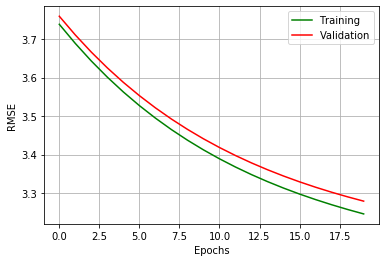

In [40]:
plt.plot(range(recommender.epochs), recommender.train_error,'g', label='Training');
plt.plot(range(recommender.epochs), recommender.val_error, 'r',label='Validation');
plt.xlabel('Epochs');plt.ylabel('RMSE');
plt.legend();plt.grid();plt.show()

In [41]:
#random user prediction
#to test SGD

user_id = 100953 
rat=r
user_index = rat.index.get_loc(user_id)

rating_predictions = recommender.predict2(train, user_index)
print(rating_predictions)

[6.49712719 6.17476423 5.24564109 6.79636694 3.69626058 5.25933135
 3.84657915 5.2428247  3.77426254 5.07733417 5.40192741 3.99263571
 3.922523   6.37003216 6.32445146 4.93798922 5.07772708 4.88875197
 6.51289475 4.66689059 6.8026036  4.73128685 5.08109724 5.80252397
 3.92951141 4.87604391 4.88628175 6.30341028 5.32512167 6.91627089
 5.1120069  3.73519596 3.96252677 5.43129261 5.97703397 5.360006
 4.90706941 4.8874971  5.06260764 5.23863363 4.94755494 4.00033673
 5.76569935 3.70622258 5.2776932  5.16101995 4.38417728 5.24445127
 4.50903478 6.07696486 5.97073769 6.06760261 4.38387892 4.92534212
 5.18655667 6.28291748 3.79091213 5.6431158  5.99580101 6.45780501
 6.10331811 5.8183289  4.55305526 5.03272454 5.00086062 5.19671237
 6.49929327 5.50837538 6.04680995 5.47953176 5.80532488 3.88245617
 6.79905129 4.18495521 5.89571008 5.89930155 3.71449881 5.3081508
 6.5040484  4.28353639 5.01798917 3.93402564 5.53794236 5.96565666
 6.62724782 3.77644945 4.8708609  5.04139647 5.20389782 5.2911072

      USER ID  nectar prague  joshua sleep  gallery fiesta  jerome jazz  \
0      100953       1.484013      0.257857        0.239617     1.133965   
1      100955       1.350588      0.397670        0.308198     0.660640   
2      100965       2.576723      1.098803        1.764609     0.157183   
3      100968       2.307185      0.236830        0.318632     0.594718   
4      100976       0.526058      2.419744        0.548373     0.109904   
5      100986       1.022697      0.337878        0.364419     1.780540   
6      100993       2.856677      1.122945        1.867636     0.167453   
7      101001       1.483582      4.217846        1.229463     2.256226   
8      101010       2.208917      0.175096        0.466090     1.790422   
9      101013       2.063558      0.275885        0.025109     0.270573   
10     101016       2.376851      0.876906        2.380454     0.121075   
11     101021       0.380142      2.734971        1.444835     1.443393   
12     101022       0.722

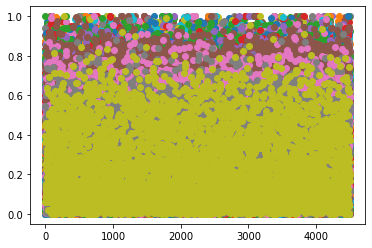

(4500, 101)

In [42]:
df = pd.read_csv('user_history.csv', sep=',')

r = df.fillna(0).values

user_ids2= df["USER ID"]
user_ids2 = user_ids2.to_numpy()

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

df = pd.read_csv('user_history.csv', sep=',')
df3=df
print(df)

r = df.fillna(0).values
r2 = r#np.delete(r,0,1)
print(r2[:,1:])

scaler = MinMaxScaler(feature_range=[0, 1])
r3 = scaler.fit_transform(r2[:,1:])

for i in range(99):
    plt.plot(r3[1:,i+1],'o')
    #print(r[0,:])
    
plt.show()
df.shape

In [43]:
#calculate SVD

U, S, VT = np.linalg.svd(r3[:,1:])

#U, S, VT = np.linalg.svd(wine_meanzero)
#svd_figure = pgo.Figure([pgo.Bar(x=np.arange(len(S)), y=S)])
#svd_figure.show()

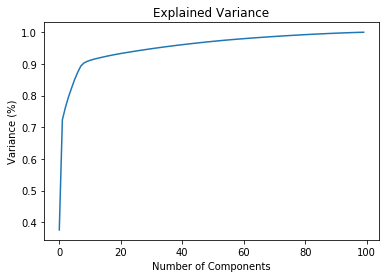

In [44]:
#find pca

pca = PCA().fit(r3)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

pca = PCA(10) #10 components
x = pca.fit_transform(r3) #transform data

df = pd.DataFrame (x)
#filepath = 'my_excel_file.xlsx'
#df.to_excel(filepath, index=false)
x.shape
df2 = df

In [45]:
#cosine similarity matrix
#USER-USER similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

dist_out = 1-pairwise_distances(x, metric="cosine")
dist_out.shape


# user similarity on replacing NAN by user avg
b = cosine_similarity(df)
#np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=df.index)
similarity_with_user.columns=df.index
similarity_with_user.head()

#Find most similary users per each unknown user, take their average from SGD and use that as the predictor for their product rating
#filter which users are not in product rating matrix
#then use cos sim matrix to find similar users
# take averages for each product rating (weighted by similarity to unknown user)


,0,1,2,3,4,5,6,7,8,9,...,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499
0,1.000000,0.989064,-0.416883,0.932746,-0.320177,0.789807,-0.448284,-0.348511,0.811652,0.900209,...,-0.306533,-0.516183,-0.362300,0.919393,-0.388855,-0.405014,-0.334519,0.951552,-0.477684,0.976186
1,0.989064,1.000000,-0.430892,0.922279,-0.328696,0.845823,-0.462740,-0.332083,0.856663,0.904623,...,-0.303901,-0.521359,-0.357857,0.928535,-0.365610,-0.418389,-0.346468,0.957441,-0.482662,0.988634
2,-0.416883,-0.430892,1.000000,-0.444852,-0.435108,-0.336159,0.938052,-0.463356,-0.370564,-0.433879,...,-0.419244,0.950657,-0.520325,-0.349957,-0.315330,0.983522,0.876494,-0.356093,0.991217,-0.442127
3,0.932746,0.922279,-0.444852,1.000000,-0.334274,0.703600,-0.430226,-0.363400,0.807112,0.982557,...,-0.286437,-0.492563,-0.356886,0.732125,-0.431535,-0.425612,-0.428766,0.798547,-0.503202,0.924556
4,-0.320177,-0.328696,-0.435108,-0.334274,1.000000,-0.361613,-0.451053,0.393201,-0.464356,-0.356068,...,0.935184,-0.411399,0.647301,-0.265080,0.238517,-0.471138,-0.322723,-0.255711,-0.418598,-0.363390


In [46]:
# top 30 neighbours for each user

#simmat= pd.DataFrame(data=dist_out[:,:], index=dist_out[:,0], columns=dist_out[0,:])

def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

#top 3 users (not counting self)
sim_user_4_m = find_n_neighbours(similarity_with_user,30)
sim_user_4_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
0,0,3411,2571,1777,943,335,2878,3314,1042,2508,...,2937,1855,1906,291,2501,1080,2505,47,3733,3967
1,1,405,3789,1909,3408,3269,3229,1051,4480,4354,...,3979,1726,0,3411,4499,2598,1887,600,4206,4436
2,2,4139,684,646,447,194,2236,3322,703,1729,...,3930,826,1734,3417,2486,3219,1494,1928,2076,4498
3,3,2345,921,2155,4217,2454,3060,3339,253,1183,...,3517,548,1705,4294,2846,39,1720,3256,1201,1292
4,4,2321,1513,2946,2813,2412,2125,2408,3161,319,...,1863,3331,4166,97,4463,3905,1810,2319,3706,3619


In [47]:
#take out users that are not in product rating user list.
print(user_ids2)
print(user_ids)
users_w_no_ratings = np.setdiff1d(user_ids2,user_ids)
print(users_w_no_ratings.shape)

[100953 100955 100965 ... 125960 125969 125976]
[100953 100953 100953 ... 117517 117517 117517]
(1500,)


In [48]:
#last user with ratings is 117517
simmat_for_noratings = sim_user_4_m[3000:4501:1]
nump_simmat = simmat_for_noratings.to_numpy()
#print(user_index)

num_to_userid = df3.iloc[:,0].to_numpy()
#print(nump_simmat)
new_predictions = []
pred_per_user = []
#print(rat.shape)
#print(num_to_userid)
#random user prediction

for i in range(1500):
    k=0;
    rating_predictions = 0;
    for j in range(1,30):
        user_id = nump_simmat[i,j];
        #print(user_id)
        if (user_id<2010):
            
            user_index = rat.index.get_loc(num_to_userid[user_id]);
            #print(user_index)
            #user_index = np.where(ratings = user_id)
            predictions_index = np.where(train[user_index, :] == 0)[0];

            rating_predictions += recommender.predict2(train, user_index);
            #print(rating_predictions.size)
            #print(i," ",rating_predictions)
            k+=1;
        
    new_predictions.append(rating_predictions/k)
predictions_for_non_ratings = np.asarray(new_predictions)
print(predictions_for_non_ratings.shape)

(1500, 100)


In [50]:
#print predictions to file

np.savetxt("predicts2.csv", predictions_for_non_ratings, delimiter=",")